In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from statistics import mean 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [38]:
data=pd.read_csv('dataset_31_credit-g.csv')

In [39]:
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [40]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [41]:
y= data.iloc[:,-1].values 

In [42]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [43]:
data.describe(include=object)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,'<100','1<=X<4','male single',none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


In [44]:
#good=1, bad=0
ylabel=LabelEncoder()
y_num=ylabel.fit_transform(y)

In [45]:
#One hot encoding of categorical variables
df = pd.get_dummies(data=data,columns=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker'])

In [46]:
x=df.drop('class',axis=1).to_numpy()

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_num, random_state=0, test_size=.20)

In [48]:
sc= StandardScaler() 
x_train= sc.fit_transform(x_train) 

In [49]:
x_test= sc.transform(x_test)

In [50]:
#QDA
qda=QuadraticDiscriminantAnalysis()
best_QDA = np.mean(cross_val_score(qda,x_train,y_train,cv=10))
print('Best QDA classifier:',best_QDA)

Best QDA classifier: 0.5987499999999999


In [51]:
# LDA
lda = LinearDiscriminantAnalysis()
best_LDA = np.mean(cross_val_score(lda,x_train,y_train,cv=10))
print('Best LDA classifier:',best_LDA)


Best LDA classifier: 0.7575000000000001


Best n_neighbors in KNN model: 16 
Corresponding accuracy: 0.7562500000000001


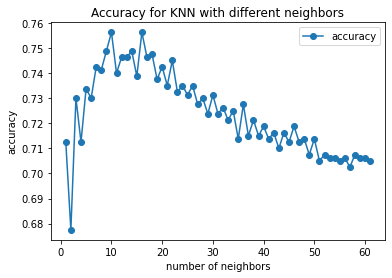

In [54]:
# KNN
k_list = np.arange(1,62)
knn_score=[]
for i in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_model, x_train, y_train,cv=4,scoring='accuracy')
    knn_score.append(np.mean(scores))

best_knn_score = np.max(knn_score)
best_knn = k_list[knn_score.index(best_knn_score)]
print('Best n_neighbors in KNN model:', best_knn, '\nCorresponding accuracy:',best_knn_score)
plt.plot(k_list,knn_score,'-o',label='accuracy')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('Accuracy for KNN with different neighbors')
plt.legend()
plt.show()

In [53]:
# GNB
gnb = GaussianNB()
best_GNB = np.mean(cross_val_score(gnb, x_train, y_train,cv=10))
print('Best Gaussian Naive Bayes classifier:',best_GNB)

Best Gaussian Naive Bayes classifier: 0.68375


Best n_estimator for Random Forest: 4 
Corresponding accuracy: 0.74625


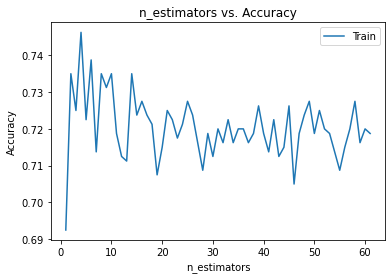

In [55]:
# Random Forest
rf_arru_1st_train=[]
n_estimator_1st = np.arange(1,62)

for k in n_estimator_1st:
    rf = RandomForestClassifier(k, max_depth=3)
    rf.fit(x_train,y_train)
    rf_arru_1st_train.append(rf.score(x_train,y_train))

best_acc = max(rf_arru_1st_train)
best_n_est = n_estimator_1st[rf_arru_1st_train.index(best_acc)]
print('Best n_estimator for Random Forest:', best_n_est, '\nCorresponding accuracy:', best_acc)


# plot the accuracies
plt.plot(n_estimator_1st, rf_arru_1st_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

In [57]:
# Decision Tree
score_DT = []
for depth in range(1,62):
    dt = DecisionTreeClassifier(max_depth=depth)
    score_DT.append(np.mean(cross_val_score(dt, x_train, y_train)))
best_DT=np.max(score_DT)
kDT= np.argmax(score_DT) + 1
print('Best decision tree classifier:', best_DT, 'for', kDT)

Best decision tree classifier: 0.7075 for 2
